In this notebook I will test evolving an HCIpy atmosphere layer in several different ways. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

from hcipy import *
# from Keck_aperture import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Telescope Setup

In [17]:
pupil_diameter = 3.048 # m
collecting_area = np.pi*(3.048**2-0.9779**2)
f_number = 13 #Effective focal ratio
effective_focal_length = pupil_diameter*f_number # m

filter_name = 'V'
wavelength = filters[filter_name]['lambda_eff']*1e-6

grid_size=256

pupil_grid = make_pupil_grid(grid_size,diameter = pupil_diameter)

#Currently the spiders here do not represent 
telescope_pupil_generator = make_lick_aperture()
telescope_pupil = telescope_pupil_generator(pupil_grid)

In [18]:
# im = imshow_field(telescope_pupil, cmap='gray')
# plt.colorbar()
# plt.xlabel('x / D')
# plt.ylabel('y / D')
# plt.show()

# Atmosphere Setup

In [19]:
seeing = 1.75 # Estimating this by eye from here: https://mthamilton.ucolick.org/techdocs/MH_weather/obstats/avg_seeing.html
outer_scale = 40 # meter - GUESS NEEDS TO BE REFINED
velocity = 20 # m/s - GUESS NEDS TO BE REFINED

fried_parameter = seeing_to_fried_parameter(seeing,500e-9)
Cn_squared = Cn_squared_from_fried_parameter(fried_parameter, 500e-9)
tau0 = 0.314 * fried_parameter/velocity


print('r0   = {0:.1f}cm'.format(fried_parameter * 100))
print('L0   = {0:.1f}m'.format(outer_scale))
print('tau0 = {0:.1f}ms'.format(tau0 * 1000))
print('v    = {0:.1f}m/s'.format(velocity))

r0   = 5.8cm
L0   = 40.0m
tau0 = 0.9ms
v    = 20.0m/s


In [20]:
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

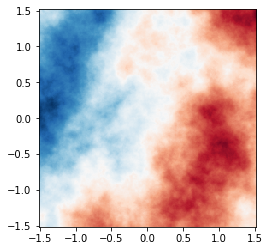

In [21]:
phase_screen_phase = layer.phase_for(wavelength) # in radian
phase_screen_opd = phase_screen_phase * (wavelength / (2 * np.pi)) * 1e6

imshow_field(phase_screen_opd, cmap='RdBu')

When evolving the atmosphere is it a delta_t that's input or absolute?

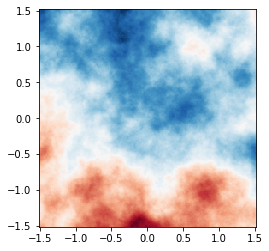

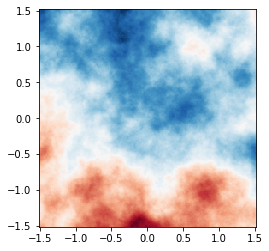

In [25]:
for i in range(2):
    layer.t= 5
    phase_screen_phase = layer.phase_for(wavelength) # in radian
    phase_screen_opd = phase_screen_phase * (wavelength / (2 * np.pi)) * 1e6
    plt.figure()
    imshow_field(phase_screen_opd, cmap='RdBu')

It is a delta_t!

## Does a copy of the atmosphere have the same phase screen?

In [8]:
import copy
layer_copy = copy.deepcopy(layer)

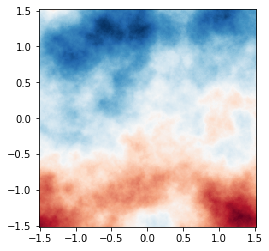

In [9]:
phase_screen_phase2 = layer_copy.phase_for(wavelength) # in radian
phase_screen_opd2 = phase_screen_phase2 * (wavelength / (2 * np.pi)) * 1e6

imshow_field(phase_screen_opd2,  cmap='RdBu')


Are they the same?

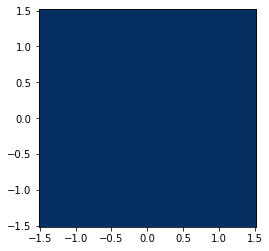

In [10]:
imshow_field(phase_screen_opd-phase_screen_opd2, vmin=-2*np.pi,  cmap='RdBu')

They are the same! Awesome

## Evolve both layers a bit now by the same amount

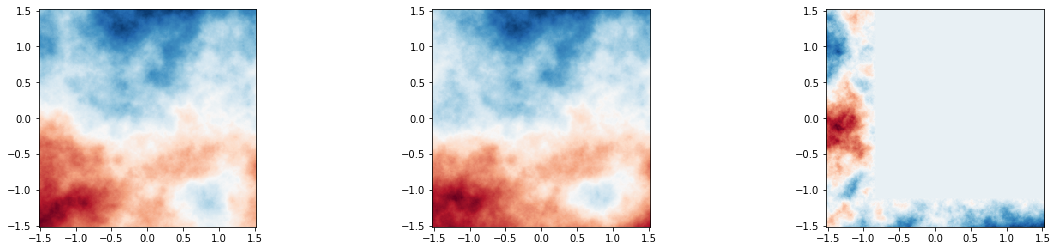

In [11]:
layer.t = 0.01
layer_copy.t = 0.01

phase_screen_phase = layer.phase_for(wavelength) # in radian
phase_screen_opd = phase_screen_phase * (wavelength / (2 * np.pi)) * 1e6

phase_screen_phase2 = layer_copy.phase_for(wavelength) # in radian
phase_screen_opd2 = phase_screen_phase2 * (wavelength / (2 * np.pi)) * 1e6


fig,axes = plt.subplots(1,3,figsize=(20,4))

imshow_field(phase_screen_opd, cmap='RdBu', ax=axes[0])
imshow_field(phase_screen_opd2,  cmap='RdBu', ax=axes[1])
imshow_field(phase_screen_opd-phase_screen_opd2, cmap='RdBu',ax=axes[2])

Great, they're still the same!

## Ok, now let's take one of them, and evolve it to t=0.01 and the other we'll evolve it by t=0.005 twice

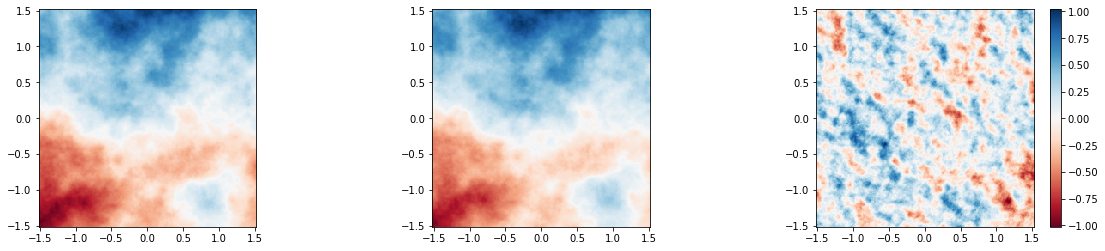

In [12]:
layer.t = 0.01

layer_copy = copy.deepcopy(layer)
layer_copy.t = 0.005
layer_copy.t = 0.005

phase_screen_phase = layer.phase_for(wavelength) # in radian
phase_screen_opd = phase_screen_phase * (wavelength / (2 * np.pi)) * 1e6

phase_screen_phase2 = layer_copy.phase_for(wavelength) # in radian
phase_screen_opd2 = phase_screen_phase2 * (wavelength / (2 * np.pi)) * 1e6


fig,axes = plt.subplots(1,3,figsize=(20,4))

imshow_field(phase_screen_opd, cmap='RdBu', ax=axes[0])
imshow_field(phase_screen_opd2,cmap='RdBu', ax=axes[1])
imshow_field(phase_screen_opd-phase_screen_opd2, cmap='RdBu',ax=axes[2])
plt.colorbar(ax=axes[2])

Ok, they're the same! What if that time step is bigger?

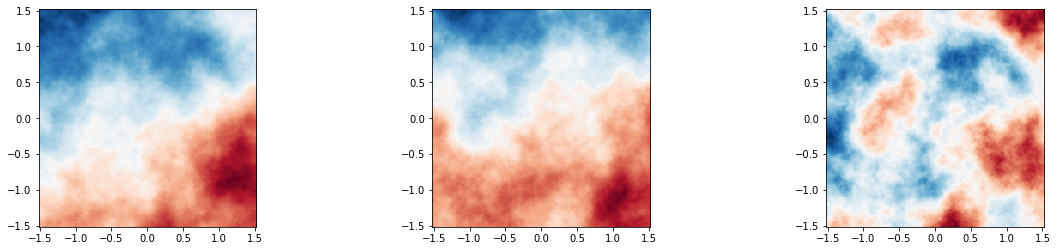

In [13]:
layer.t = 0.1

layer_copy = copy.deepcopy(layer)
layer_copy.t = 0.05
layer_copy.t = 0.05

phase_screen_phase = layer.phase_for(wavelength) # in radian
phase_screen_opd = phase_screen_phase * (wavelength / (2 * np.pi)) * 1e6

phase_screen_phase2 = layer_copy.phase_for(wavelength) # in radian
phase_screen_opd2 = phase_screen_phase2 * (wavelength / (2 * np.pi)) * 1e6


fig,axes = plt.subplots(1,3,figsize=(20,4))

imshow_field(phase_screen_opd,  cmap='RdBu', ax=axes[0])
imshow_field(phase_screen_opd2,  cmap='RdBu', ax=axes[1])
imshow_field(phase_screen_opd-phase_screen_opd2, cmap='RdBu',ax=axes[2])

# If you set layer.t = 0, does that change anything?

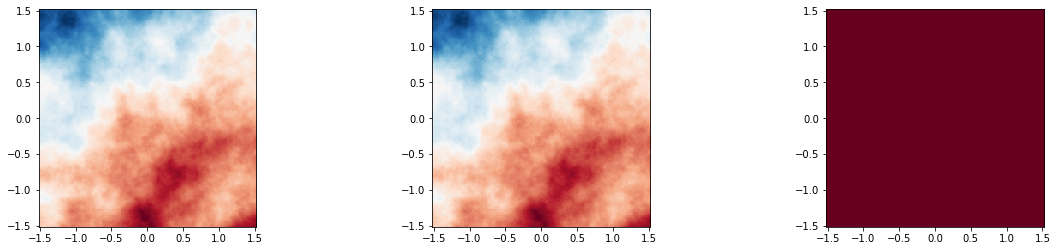

In [15]:
layer.t = 0
layer_copy = copy.deepcopy(layer)
layer_copy.t = 0.

phase_screen_phase = layer.phase_for(wavelength) # in radian
phase_screen_opd = phase_screen_phase * (wavelength / (2 * np.pi)) * 1e6

phase_screen_phase2 = layer_copy.phase_for(wavelength) # in radian
phase_screen_opd2 = phase_screen_phase2 * (wavelength / (2 * np.pi)) * 1e6


fig,axes = plt.subplots(1,3,figsize=(20,4))

imshow_field(phase_screen_opd,  cmap='RdBu', ax=axes[0])
imshow_field(phase_screen_opd2,  cmap='RdBu', ax=axes[1])
imshow_field(phase_screen_opd-phase_screen_opd2, cmap='RdBu',ax=axes[2])